# Customer Churn Prediction Project

### Step-1: Import Important Libraries

In [95]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### Step-2: Data Collection

In [96]:
df=pd.read_csv("Telco-Customer-Churn (1).csv")

In [97]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
df.shape

(7043, 21)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [100]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Step-3: Data Preprocessing

In [101]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [102]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [103]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [104]:
# convert total charges into numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce') 
df.dropna(inplace=True)

In [105]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [106]:
# Drop Irrelevant Column
df.drop('customerID', axis=1,inplace=True)

In [107]:
# Encode Categorical Variables
cat_cols = df.select_dtypes(include='object').columns
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])
    

In [108]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [109]:
# Standardize Features
sc=StandardScaler()
sc.fit_transform(x)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Step-4: Visualization

<Axes: xlabel='Churn', ylabel='count'>

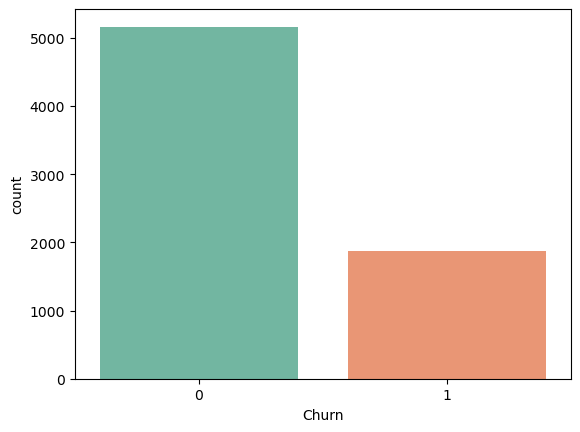

In [110]:
sns.countplot(df,x='Churn',palette='Set2')

<Axes: xlabel='TotalCharges', ylabel='Count'>

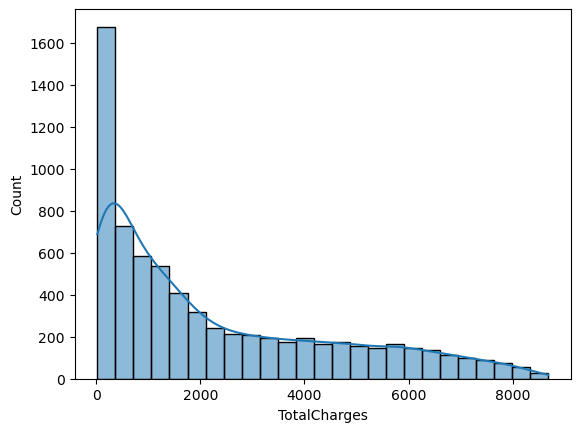

In [111]:
sns.histplot(df, x='TotalCharges', kde=True)

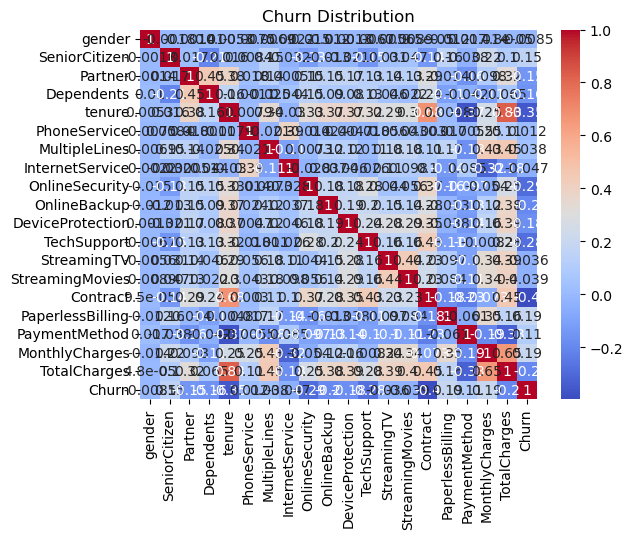

In [112]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Churn Distribution")
plt.show()

### Step-5:Feature Engineering

In [113]:
# Feature and Target Split
x = df.drop(['Churn'],axis=1)
y = df['Churn']

In [114]:
# imbalanced data
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x,y)
y_res.value_counts()


Churn
0    5163
1    5163
Name: count, dtype: int64

In [115]:
# split the Data
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)

### Step-6: Modeling

In [116]:
from xgboost import XGBClassifier
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier()
}


### Step-7:Evaluation

In [117]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"\n{name} Evaluation:")
    print(f"Accuracy   : {acc:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"Recall     : {recall:.4f}")
    print(f"ROC-AUC    : {roc_auc:.4f}")



Decision Tree Evaluation:
Accuracy   : 0.7841
F1 Score   : 0.7812
Recall     : 0.7736
ROC-AUC    : 0.7850

Random Forest Evaluation:
Accuracy   : 0.8364
F1 Score   : 0.8358
Recall     : 0.8358
ROC-AUC    : 0.9195

Logistic Regression Evaluation:
Accuracy   : 0.7904
F1 Score   : 0.7927
Recall     : 0.8047
ROC-AUC    : 0.8673

XGBoost Evaluation:
Accuracy   : 0.8388
F1 Score   : 0.8378
Recall     : 0.8358
ROC-AUC    : 0.9216


### Step-8:Cross Validation 

In [118]:
# Define metrics
scoring_metrics = {
    'Accuracy': 'accuracy',
    'F1': 'f1',
    'Recall': 'recall',
    'ROC-AUC': 'roc_auc'
}

# Define Stratified K-Fold for consistent class distribution in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Collect results
results = []
for name, model in models.items():
    row = {'Model': name}
    for metric_name, scoring in scoring_metrics.items():
        scores = cross_val_score(model, x, y, cv=skf, scoring=scoring)
        row[metric_name] = scores.mean()
    results.append(row)

# Convert to DataFrame and print
df_results = pd.DataFrame(results)
print(df_results)

                 Model  Accuracy        F1    Recall   ROC-AUC
0        Decision Tree  0.725681  0.490627  0.498661  0.654512
1        Random Forest  0.793515  0.555716  0.481534  0.823320
2  Logistic Regression  0.798493  0.592656  0.551631  0.841959
3              XGBoost  0.786688  0.564789  0.521131  0.821786


### Step-9: Accuracy check

In [119]:
# Store results
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
 
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
      
    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })
    
#  convert to DataFrame for tabular view
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Train Accuracy  Test Accuracy
0        Decision Tree        0.998910       0.791384
1        Random Forest        0.998910       0.836883
2  Logistic Regression        0.801332       0.790416
3              XGBoost        0.954237       0.838819


### Step-10: Save The Model

In [120]:
best_model = LogisticRegression()
best_model.fit(x_train, y_train)
# Save it
import joblib
joblib.dump(best_model, 'logistic_model.pkl')

['logistic_model.pkl']

In [121]:
best_model=joblib.load('logistic_model.pkl')

In [122]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [123]:
best_model.predict([[1,	0,	0,	0,	2,	1,	0,	0,	2,	2,	0,	0,	0,	0,	0,	1,	3,	53.85,	108.15]])

array([0])

# Conclusion:

                     In this project, we analyzed the Telco Customer Churn dataset to identify the key factors contributing to customer attrition and built predictive models to anticipate churn.

### 